<a href="https://colab.research.google.com/github/sujithgunturu/colabtogit/blob/main/make_high_quality_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.python.summary.summary_iterator import summary_iterator

In [ ]:
DIR_TRAIN = '/content/drive/MyDrive/yolov5/runs/train/wml'

In [ ]:
txtfile = DIR_TRAIN + "/results.txt"

In [ ]:
# f = open("/content/drive/MyDrive/yolov5/runs/train/wml/results.txt", "r")
# totalfile  = []
# for line in f:
#   linelist = line.split()
#   linelist.pop(0)
#   linelist.pop(0)
#   totalfile.append(linelist)
# totalfile =np.array(totalfile)
# totalfile = totalfile.astype("float")
# for i in range(len(totalfile[0])):
#   plt.plot(totalfile[:, i])
#   plt.show()

In [ ]:
#events_file = "/content/drive/MyDrive/yolov5/runs/train/wml/events.out.tfevents.1612897799.2791dd6b938a.271.0"
events_file = "/content/drive/MyDrive/yolov5/runs/train/wheatmodelmedium/events.out.tfevents.1620779267.65a2b4983087.664.0"

In [ ]:
train_box_loss = []
train_obj_loss = []
train_cls_loss = []
metrics_precision = []

#
metrics_recall = []
metrics_mAP_05 = []
matrix_map_0095 = []

######
val_box_loss = []
val_obj_loss = []
val_cls_loss = []

####
x_lr0 = []
x_lr1 = []
x_lr2 = []
for summary in summary_iterator(events_file):
  for v in summary.summary.value:
      if v.tag == 'train/box_loss':
        train_box_loss.append(v.simple_value)

      elif v.tag == 'train/obj_loss':
        train_obj_loss.append(v.simple_value)

      elif v.tag == 'train/cls_loss':
        train_cls_loss.append(v.simple_value)

      elif v.tag == "metrics/precision":
        metrics_precision.append(v.simple_value)

      elif v.tag == 'metrics/recall':
        metrics_recall.append(v.simple_value)

      elif v.tag == 'metrics/mAP_0.5':
        metrics_mAP_05.append(v.simple_value)

      elif v.tag == 'metrics/mAP_0.5:0.95':
        matrix_map_0095.append(v.simple_value)

      elif v.tag == 'val/box_loss':
        val_box_loss.append(v.simple_value)

      elif v.tag == 'val/obj_loss':
        val_obj_loss.append(v.simple_value)

      elif v.tag == "val/cls_loss":
        val_cls_loss.append(v.simple_value)

      elif v.tag == "x/lr0":
        x_lr0.append(v.simple_value)

      elif v.tag == 'x/lr1':
        x_lr1.append(v.simple_value)

      elif v.tag == 'x/lr2':
        x_lr2.append(v.simple_value)

In [ ]:
#Mean average precision
# fig = plt.figure(figsize=(9, 6))
# plt.xlabel("number of epochs")
# plt.title("Mean average Precision(mAP)" )
# plt.plot(matrix_map_0095, label = "mAP_0.5:0.95")
# plt.plot(metrics_mAP_05, label = "mAP_0.5")
# plt.legend()
# plt.savefig("MAP.jpg", dpi = 300)
# plt.show()

In [ ]:
# #Precision
# fig = plt.figure(figsize=(9, 6))
# plt.xlabel("number of epochs")
# plt.title("Precision and Recall" )
# plt.plot(metrics_precision, label = "Precision")
# plt.plot(metrics_recall, label = "Recall")
# plt.legend()
# plt.savefig("PRCURVE.png", dpi = 300)
# plt.show()

In [ ]:
# #Trainin, validation box loos
# fig = plt.figure(figsize=(9, 6))
# plt.xlabel("number of epochs")
# plt.title("Box Loss" )
# plt.plot(train_box_loss, label = "Train")
# plt.plot(val_box_loss, label = "validation")
# plt.legend()
# plt.savefig("boxloss.png", dpi = 300)
# plt.show()

In [ ]:
# #Trainin, validation obj loss
# fig = plt.figure(figsize=(9, 6))
# plt.xlabel("number of epochs")
# plt.title("Object Loss" )
# plt.plot(train_obj_loss, label = "Train")
# plt.plot(val_obj_loss, label = "validation")
# plt.legend()
# plt.savefig("objloss.png", dpi = 300)
# plt.show()

In [ ]:
# fig = plt.figure(figsize=(9, 6))
# plt.xlabel("number of epochs")
# plt.title("Class Loss" )
# plt.plot(train_cls_loss, label = "Train")
# plt.plot(train_cls_loss, label = "validation")
# plt.legend()
# plt.savefig("classloss.png", dpi = 300)
# plt.show()

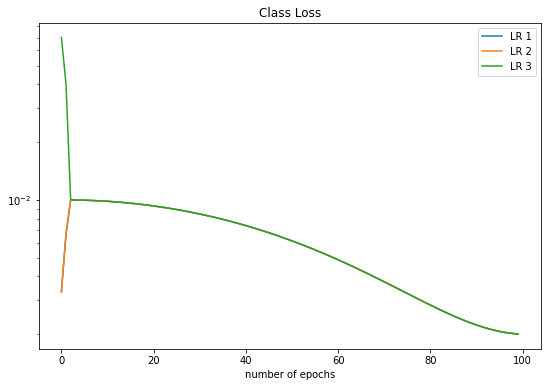

In [ ]:
fig = plt.figure(figsize=(9, 6))
plt.xlabel("number of epochs")
plt.title("Class Loss" )
plt.plot(x_lr0, label = "LR 1")
plt.plot(x_lr1, label = "LR 2")
plt.plot(x_lr2, label = "LR 3")
plt.legend()
plt.yscale("log")
# plt.savefig("lr.png", dpi = 300)
plt.show()

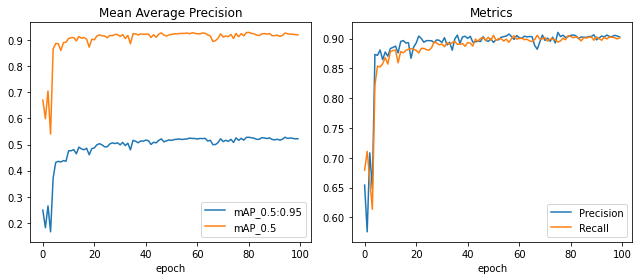

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
axes[0].plot(matrix_map_0095, label = "mAP_0.5:0.95")
axes[0].plot(metrics_mAP_05, label = "mAP_0.5")
axes[0].set_xlabel("epoch")
axes[0].legend()
axes[0].set_title("Mean Average Precision")

axes[1].plot(metrics_precision, label = "Precision")

axes[1].plot(metrics_recall, label = "Recall")

axes[1].legend()
axes[1].set_xlabel("epoch")
axes[1].set_title("Metrics")
fig.tight_layout()
# plt.savefig("mape_pres_recall.jpg", dpi = 300)

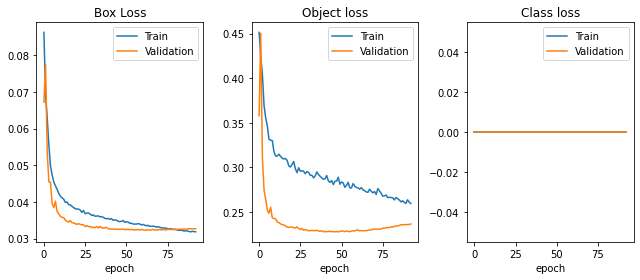

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 4))
axes[0].plot(train_box_loss, label = "Train")
axes[0].plot(val_box_loss, label = "Validation")
axes[0].set_xlabel("epoch")
axes[0].legend()
axes[0].set_title("Box Loss")

axes[1].plot(train_obj_loss, label = "Train")
axes[1].plot(val_obj_loss, label = "Validation")
axes[1].legend()
axes[1].set_xlabel("epoch")
axes[1].set_title("Object loss")


axes[2].plot(train_cls_loss, label = "Train")
axes[2].plot(val_cls_loss, label = "Validation")
axes[2].legend()
axes[2].set_xlabel("epoch")
axes[2].set_title("Class loss")
fig.tight_layout()

plt.savefig("mape_pres_recall.jpg", dpi = 300)

In [ ]:
events_file_2 = "/content/events.out.tfevents.1633728475.9770ccb9cd38.24.0"

In [ ]:
class added:
  def __init__(self, value = []):
    self.value  = []
  def add(self, val):
    self.value.append(val)

In [ ]:
faster_rcnn_obj = []
faster_rcnn_box = []
faster_rcnn_epoch_loss = []
try:
  for summary in summary_iterator(events_file_2):
    for v in summary.summary.value:
        if v.tag == "Loss/iter_box_loss":
          faster_rcnn_obj.append(v.simple_value)
        elif v.tag == "Loss/iter_obj_loss":
          faster_rcnn_obj.append(v.simple_value)
        elif v.tag == "Loss/epoch_loss":
          faster_rcnn_epoch_loss.append(v.simple_value)
except:
  pass

In [ ]:
yololoss = np.array(train_box_loss)

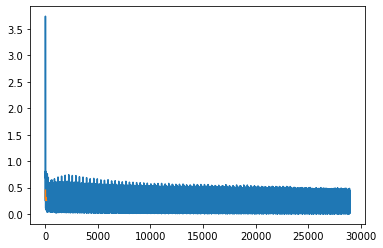

In [ ]:
plt.plot(faster_rcnn_obj)
plt.plot(train_obj_loss)

In [ ]:
_loss = np.array(faster_rcnn_obj)[:28000]
_loss = _loss.reshape((100, -1))
__loss = np.average(_loss, axis=1)
__loss.shape

(100,)

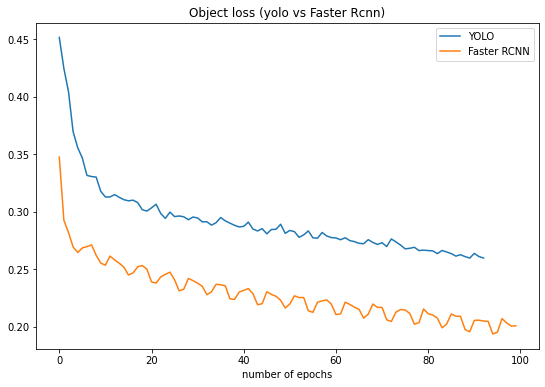

In [ ]:
fig = plt.figure(figsize=(9, 6))
plt.xlabel("number of epochs")
plt.title("Object loss (yolo vs Faster Rcnn)" )
plt.plot(train_obj_loss, label = "YOLO")
plt.plot(__loss, label = "Faster RCNN")
plt.legend()
plt.savefig("loss_yolo_frcnn.png", dpi = 300)
plt.show()

In [ ]:
_loss = np.array(faster_rcnn_box)[:28000]
_loss = _loss.reshape((100, -1))
__loss = np.average(_loss, axis=1)
__loss.shape

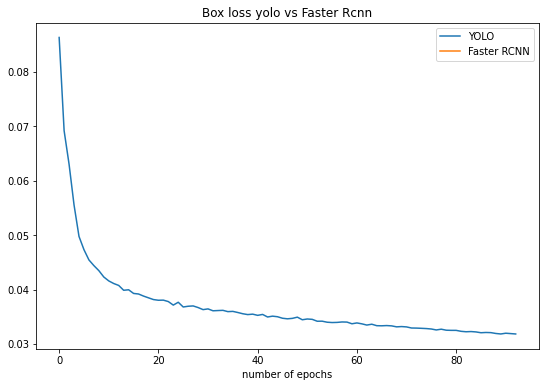

In [ ]:
fig = plt.figure(figsize=(9, 6))
plt.xlabel("number of epochs")
plt.title("Box loss yolo vs Faster Rcnn" )
plt.plot(train_box_loss, label = "YOLO")
plt.plot(faster_rcnn_box, label = "Faster RCNN")
plt.legend()
# plt.savefig("asd.png", dpi = 300)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

labels = [
          #
          0,0,0,0,0, 0,0,0,0,0,
          # 
          1,1,1,1,1, 1,1,1,1,1,
          #
          2,2,2,2,2, 2,2,2,2,2,
          #
          0,0,0,0,0, 0,0,0,0,0,
          #
          1,1,1,1,1, 1,1,1,1,1,
          #
          2,2,2,2,2, 2,2,2,2,2,
          #
          2,2,2,2,2, 2,2,2,2,2,
          #
          1,1,1,1,1, 1,1,1,1,1,
          #
          0,0,0,0,0, 0,0,0,0,0,
          #
          0,1,2,0,1, 0,1,2,0,1
]
predictions = [
          #
          0,0,0,0,0, 0,0,0,0,0,
          # 
          1,2,1,1,1, 1,1,2,1,1,
          #
          2,1,2,2,2, 2,2,2,2,2,
          #
          0,0,0,0,0, 0,0,0,0,0,
          #
          1,1,1,1,1, 1,2,1,1,1,
          #
          2,1,2,2,2, 2,2,2,2,2,
          #
          2,2,2,1,2, 2,2,2,2,2,
          #
          1,1,1,1,2, 1,1,1,1,1,
          #
          0,0,0,0,0, 0,0,0,0,0,
          #
          0,1,2,0,1, 0,1,1,0,1
]

cm = confusion_matrix(labels, predictions)
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)
print(cm)
print("clss precison", precision)
print("class recall", recall)

print("total recall", np.mean(recall))

print("Total precision", np.mean(precision))

[[34  0  0]
 [ 0 30  4]
 [ 0  4 28]]
clss precison [1.         0.88235294 0.875     ]
class recall [1.         0.88235294 0.875     ]
total recall 0.9191176470588235
Total precision 0.9191176470588235


In [ ]:
cm

array([[34,  0,  0],
       [ 0, 30,  4],
       [ 0,  4, 28]])

               Healthy wheat  Leaf Rust  Stem Rust
Healthy wheat             34          0          0
Leaf Rust                  0         30          4
Stem Rust                  0          4         28


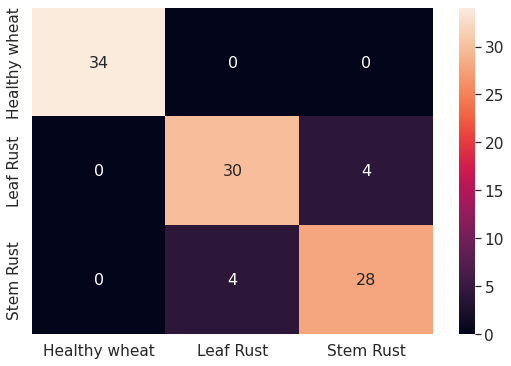

In [ ]:

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: '%.3f' % x)
array = cm
x_axis = ["Healthy wheat", "Leaf Rust", "Stem Rust"]
y_axis = ["Healthy wheat", "Leaf Rust", "Stem Rust"]
df_cm = pd.DataFrame(array, x_axis, y_axis)
plt.figure(figsize=(9,6))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g' ) # font size
plt.savefig("confusion matrix", dpi = 300)
plt.show()